In [1]:
import os
import shutil
src = "Resources\\ISL\\Alphabets"
dest = "Resources\\Train_alpha"
for d in os.listdir(src):
    os.mkdir(f"{dest}\{d}")

In [2]:
for d in os.listdir(src):
    files = os.listdir(f"{src}\\{d}")[:500]
    for file in files:
        shutil.copy(f"{src}\\{d}\\{file}",f"{dest}\\{d}")

In [3]:
from Libs.HandTracker import HandTracker
from Libs import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def distanceMatrix(handData, palmdist):
    """Eucledian distances between points 0,4,5,9,13,17,8,12,16 and 20"""
    distMatrix = np.zeros([len(handData), len(handData)], dtype="float32")
    pd = palmdist[0]
    for i in range(len(handData)):
        if i > 9:
            pd = palmdist[1]
        for j in range(len(handData)):
            distMatrix[i][j] = np.linalg.norm(np.array(handData[i]) - np.array(handData[j])) /pd
    return distMatrix

In [82]:
def getData(images):
    train_data = []
    labels = []
    points = [0, 4, 5, 9, 13, 17, 8, 12, 16, 20]
    tracker = HandTracker(static= True)
    for i,imagepath in enumerate(images,1):
        print(f"{i} / {len(images)}")
        image = cv2.cvtColor(cv2.imread(imagepath),cv2.COLOR_BGR2RGB)
        results = tracker.findHands(image)
        positions = []
        palmdist = []
        if results:
            for landmarks in results:
                tracker.drawHands(image, landmarks)
                position = tracker.getPos(landmarks.landmark, image.shape, points)
                pd = np.linalg.norm(np.array(position[0]) - np.array(position[3]))
                palmdist.append(pd)
                positions.extend(position)
            train_data.append(distanceMatrix(positions, palmdist))
        else:
            print("No hand found")
    return np.asarray(train_data)

In [65]:
images = utils.getFiles("Resources/Train_alpha", (".jpg", ".png"))
labels = np.array([p.split("\\")[-2] for p in images])

In [66]:
len(images),len(labels)

(10000, 10000)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images,labels,train_size=0.75,random_state=42)

In [68]:
X_train[:5],y_train[:5]

(['Resources/Train_alpha\\M\\28.jpg',
  'Resources/Train_alpha\\K\\256.jpg',
  'Resources/Train_alpha\\R\\1176.jpg',
  'Resources/Train_alpha\\Z\\193.jpg',
  'Resources/Train_alpha\\D\\1089.jpg'],
 array(['M', 'K', 'R', 'Z', 'D'], dtype='<U1'))

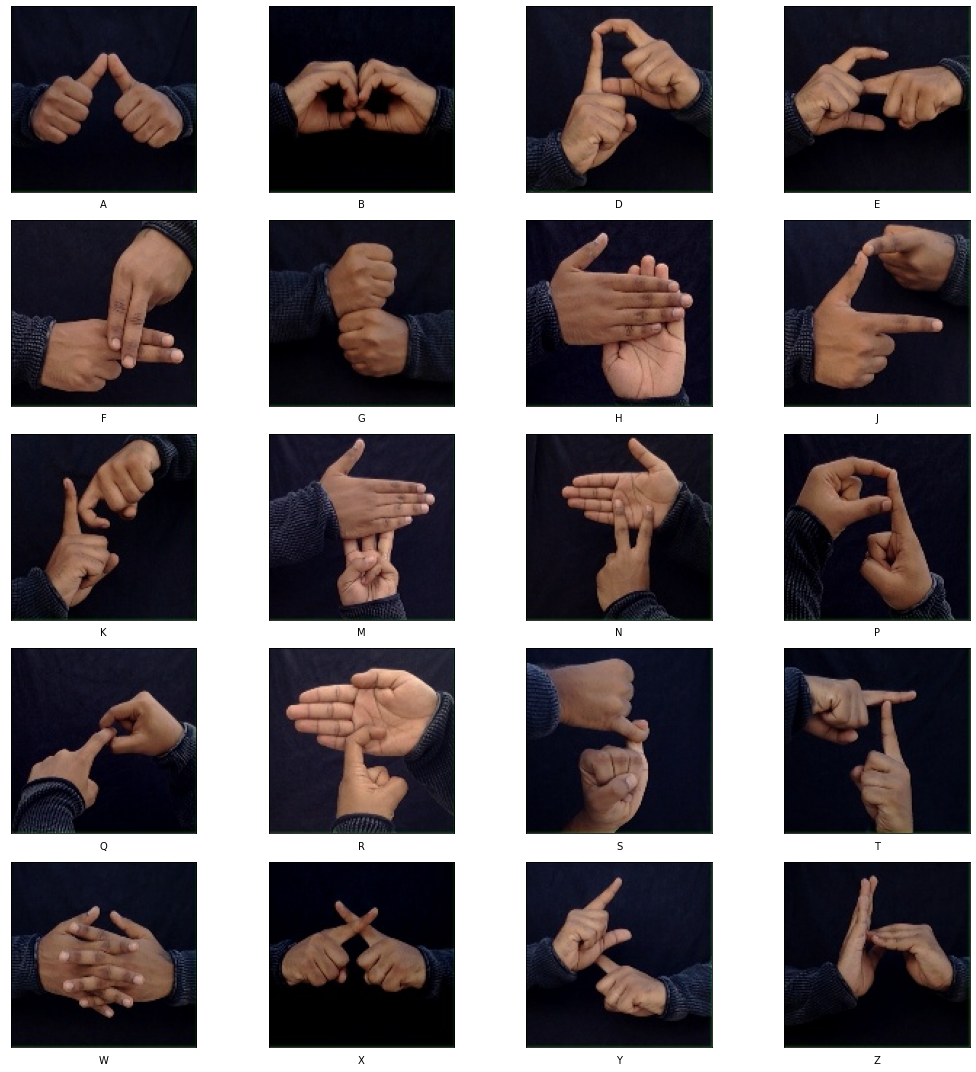

In [100]:
test = [f"Resources/Train_alpha/{val}/1000.jpg" for val in np.unique(labels)]
test_labels = np.unique(labels)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xlabel(test_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cv2.cvtColor(cv2.imread(test[i]),cv2.COLOR_BGR2RGB))
plt.tight_layout()

In [101]:
# Visualizing image differences
visual_data = getData(test)

1 / 20
2 / 20
3 / 20
4 / 20
5 / 20
6 / 20
7 / 20
8 / 20
9 / 20
10 / 20
11 / 20
12 / 20
13 / 20
14 / 20
15 / 20
16 / 20
17 / 20
18 / 20
19 / 20
20 / 20


C:\Users\amishra\AppData\Local\Temp\ipykernel_14084\1695631897.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(train_data)


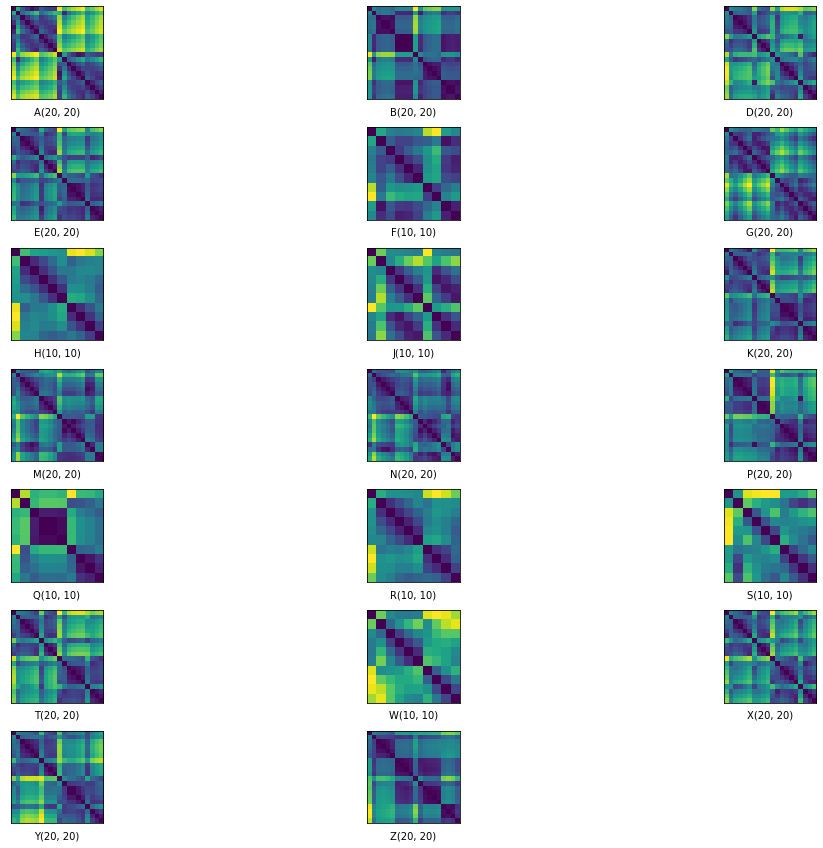

In [102]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(9,3,i+1)
    plt.xlabel(test_labels[i] + f"{visual_data[i].shape}")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(visual_data[i])
plt.tight_layout()

In [42]:
X_train = getData(X_train)

1 / 3375
2 / 3375
3 / 3375
4 / 3375
5 / 3375
6 / 3375
7 / 3375
8 / 3375
9 / 3375
10 / 3375
11 / 3375
12 / 3375
13 / 3375
14 / 3375
15 / 3375
16 / 3375
17 / 3375
18 / 3375
19 / 3375
20 / 3375
21 / 3375
22 / 3375
23 / 3375
24 / 3375
25 / 3375
26 / 3375
27 / 3375
28 / 3375
29 / 3375
30 / 3375
31 / 3375
32 / 3375
33 / 3375
34 / 3375
35 / 3375
36 / 3375
37 / 3375
38 / 3375
39 / 3375
40 / 3375
41 / 3375
42 / 3375
43 / 3375
44 / 3375
45 / 3375
46 / 3375
47 / 3375
48 / 3375
49 / 3375
50 / 3375
51 / 3375
52 / 3375
53 / 3375
54 / 3375
55 / 3375
56 / 3375
57 / 3375
58 / 3375
59 / 3375
60 / 3375
61 / 3375
62 / 3375
63 / 3375
64 / 3375
65 / 3375
66 / 3375
67 / 3375
68 / 3375
69 / 3375
70 / 3375
71 / 3375
72 / 3375
73 / 3375
74 / 3375
75 / 3375
76 / 3375
77 / 3375
78 / 3375
79 / 3375
80 / 3375
81 / 3375
82 / 3375
83 / 3375
84 / 3375
85 / 3375
86 / 3375
87 / 3375
88 / 3375
89 / 3375
90 / 3375
91 / 3375
92 / 3375
93 / 3375
94 / 3375
95 / 3375
96 / 3375
97 / 3375
98 / 3375
99 / 3375
100 / 3375
101 / 33

757 / 3375
758 / 3375
759 / 3375
760 / 3375
761 / 3375
762 / 3375
763 / 3375
764 / 3375
765 / 3375
766 / 3375
767 / 3375
768 / 3375
769 / 3375
770 / 3375
771 / 3375
772 / 3375
773 / 3375
774 / 3375
775 / 3375
776 / 3375
777 / 3375
778 / 3375
779 / 3375
780 / 3375
781 / 3375
782 / 3375
783 / 3375
784 / 3375
785 / 3375
786 / 3375
787 / 3375
788 / 3375
789 / 3375
790 / 3375
791 / 3375
792 / 3375
793 / 3375
794 / 3375
795 / 3375
796 / 3375
797 / 3375
798 / 3375
799 / 3375
800 / 3375
801 / 3375
802 / 3375
803 / 3375
804 / 3375
805 / 3375
806 / 3375
807 / 3375
808 / 3375
809 / 3375
810 / 3375
811 / 3375
812 / 3375
813 / 3375
814 / 3375
815 / 3375
816 / 3375
817 / 3375
818 / 3375
819 / 3375
820 / 3375
821 / 3375
822 / 3375
823 / 3375
824 / 3375
825 / 3375
826 / 3375
827 / 3375
828 / 3375
829 / 3375
830 / 3375
831 / 3375
832 / 3375
833 / 3375
834 / 3375
835 / 3375
836 / 3375
837 / 3375
838 / 3375
839 / 3375
840 / 3375
841 / 3375
842 / 3375
843 / 3375
844 / 3375
845 / 3375
846 / 3375
847 / 3375

1465 / 3375
1466 / 3375
1467 / 3375
1468 / 3375
1469 / 3375
1470 / 3375
1471 / 3375
1472 / 3375
1473 / 3375
1474 / 3375
1475 / 3375
1476 / 3375
1477 / 3375
1478 / 3375
1479 / 3375
1480 / 3375
1481 / 3375
1482 / 3375
1483 / 3375
1484 / 3375
1485 / 3375
1486 / 3375
1487 / 3375
1488 / 3375
1489 / 3375
1490 / 3375
1491 / 3375
1492 / 3375
1493 / 3375
1494 / 3375
1495 / 3375
1496 / 3375
1497 / 3375
1498 / 3375
1499 / 3375
1500 / 3375
1501 / 3375
1502 / 3375
1503 / 3375
1504 / 3375
1505 / 3375
1506 / 3375
1507 / 3375
1508 / 3375
1509 / 3375
1510 / 3375
1511 / 3375
1512 / 3375
1513 / 3375
1514 / 3375
1515 / 3375
1516 / 3375
1517 / 3375
1518 / 3375
1519 / 3375
1520 / 3375
1521 / 3375
1522 / 3375
1523 / 3375
1524 / 3375
1525 / 3375
1526 / 3375
1527 / 3375
1528 / 3375
1529 / 3375
1530 / 3375
1531 / 3375
1532 / 3375
1533 / 3375
1534 / 3375
1535 / 3375
1536 / 3375
1537 / 3375
1538 / 3375
1539 / 3375
1540 / 3375
1541 / 3375
1542 / 3375
1543 / 3375
1544 / 3375
1545 / 3375
1546 / 3375
1547 / 3375
1548

2149 / 3375
2150 / 3375
2151 / 3375
2152 / 3375
2153 / 3375
2154 / 3375
2155 / 3375
2156 / 3375
2157 / 3375
2158 / 3375
2159 / 3375
2160 / 3375
2161 / 3375
2162 / 3375
2163 / 3375
2164 / 3375
2165 / 3375
2166 / 3375
2167 / 3375
2168 / 3375
2169 / 3375
2170 / 3375
2171 / 3375
2172 / 3375
2173 / 3375
2174 / 3375
2175 / 3375
2176 / 3375
2177 / 3375
2178 / 3375
2179 / 3375
2180 / 3375
2181 / 3375
2182 / 3375
2183 / 3375
2184 / 3375
2185 / 3375
2186 / 3375
2187 / 3375
2188 / 3375
2189 / 3375
2190 / 3375
2191 / 3375
2192 / 3375
2193 / 3375
2194 / 3375
2195 / 3375
2196 / 3375
2197 / 3375
2198 / 3375
2199 / 3375
2200 / 3375
2201 / 3375
2202 / 3375
2203 / 3375
2204 / 3375
2205 / 3375
2206 / 3375
2207 / 3375
2208 / 3375
2209 / 3375
2210 / 3375
2211 / 3375
2212 / 3375
2213 / 3375
2214 / 3375
2215 / 3375
2216 / 3375
2217 / 3375
2218 / 3375
2219 / 3375
2220 / 3375
2221 / 3375
2222 / 3375
2223 / 3375
2224 / 3375
2225 / 3375
2226 / 3375
2227 / 3375
2228 / 3375
2229 / 3375
2230 / 3375
2231 / 3375
2232

2833 / 3375
2834 / 3375
2835 / 3375
2836 / 3375
2837 / 3375
2838 / 3375
2839 / 3375
2840 / 3375
2841 / 3375
2842 / 3375
2843 / 3375
2844 / 3375
2845 / 3375
2846 / 3375
2847 / 3375
2848 / 3375
2849 / 3375
2850 / 3375
2851 / 3375
2852 / 3375
2853 / 3375
2854 / 3375
2855 / 3375
2856 / 3375
2857 / 3375
2858 / 3375
2859 / 3375
2860 / 3375
2861 / 3375
2862 / 3375
2863 / 3375
2864 / 3375
2865 / 3375
2866 / 3375
2867 / 3375
2868 / 3375
2869 / 3375
2870 / 3375
2871 / 3375
2872 / 3375
2873 / 3375
2874 / 3375
2875 / 3375
2876 / 3375
2877 / 3375
2878 / 3375
2879 / 3375
2880 / 3375
2881 / 3375
2882 / 3375
2883 / 3375
2884 / 3375
2885 / 3375
2886 / 3375
2887 / 3375
2888 / 3375
2889 / 3375
2890 / 3375
2891 / 3375
2892 / 3375
2893 / 3375
2894 / 3375
2895 / 3375
2896 / 3375
2897 / 3375
2898 / 3375
2899 / 3375
2900 / 3375
2901 / 3375
2902 / 3375
2903 / 3375
2904 / 3375
2905 / 3375
2906 / 3375
2907 / 3375
2908 / 3375
2909 / 3375
2910 / 3375
2911 / 3375
2912 / 3375
2913 / 3375
2914 / 3375
2915 / 3375
2916

In [27]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(13,2,i+1)
    plt.xlabel(i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[np.where(y_train == (i+1))[0][0]])
plt.tight_layout()

['Resources/Train_alpha\\P\\281.jpg',
 'Resources/Train_alpha\\U\\123.jpg',
 'Resources/Train_alpha\\L\\203.jpg',
 'Resources/Train_alpha\\G\\1040.jpg',
 'Resources/Train_alpha\\P\\1056.jpg',
 'Resources/Train_alpha\\P\\1193.jpg',
 'Resources/Train_alpha\\C\\137 copy.jpg',
 'Resources/Train_alpha\\U\\17.jpg',
 'Resources/Train_alpha\\U\\138.jpg',
 'Resources/Train_alpha\\A\\293.jpg']

In [43]:
X_test[:5],y_test[:5]

(['Resources/Train\\5\\21.jpg',
  'Resources/Train\\8\\1166.jpg',
  'Resources/Train\\6\\346.jpg',
  'Resources/Train\\6\\362.jpg',
  'Resources/Train\\1\\340.jpg'],
 array([5, 8, 6, 6, 1], dtype=uint8))

In [44]:
X_test = getData(X_test)

1 / 1125
2 / 1125
3 / 1125
4 / 1125
5 / 1125
6 / 1125
7 / 1125
8 / 1125
9 / 1125
10 / 1125
11 / 1125
12 / 1125
13 / 1125
14 / 1125
15 / 1125
16 / 1125
17 / 1125
18 / 1125
19 / 1125
20 / 1125
21 / 1125
22 / 1125
23 / 1125
24 / 1125
25 / 1125
26 / 1125
27 / 1125
28 / 1125
29 / 1125
30 / 1125
31 / 1125
32 / 1125
33 / 1125
34 / 1125
35 / 1125
36 / 1125
37 / 1125
38 / 1125
39 / 1125
40 / 1125
41 / 1125
42 / 1125
43 / 1125
44 / 1125
45 / 1125
46 / 1125
47 / 1125
48 / 1125
49 / 1125
50 / 1125
51 / 1125
52 / 1125
53 / 1125
54 / 1125
55 / 1125
56 / 1125
57 / 1125
58 / 1125
59 / 1125
60 / 1125
61 / 1125
62 / 1125
63 / 1125
64 / 1125
65 / 1125
66 / 1125
67 / 1125
68 / 1125
69 / 1125
70 / 1125
71 / 1125
72 / 1125
73 / 1125
74 / 1125
75 / 1125
76 / 1125
77 / 1125
78 / 1125
79 / 1125
80 / 1125
81 / 1125
82 / 1125
83 / 1125
84 / 1125
85 / 1125
86 / 1125
87 / 1125
88 / 1125
89 / 1125
90 / 1125
91 / 1125
92 / 1125
93 / 1125
94 / 1125
95 / 1125
96 / 1125
97 / 1125
98 / 1125
99 / 1125
100 / 1125
101 / 11

759 / 1125
760 / 1125
761 / 1125
762 / 1125
763 / 1125
764 / 1125
765 / 1125
766 / 1125
767 / 1125
768 / 1125
769 / 1125
770 / 1125
771 / 1125
772 / 1125
773 / 1125
774 / 1125
775 / 1125
776 / 1125
777 / 1125
778 / 1125
779 / 1125
780 / 1125
781 / 1125
782 / 1125
783 / 1125
784 / 1125
785 / 1125
786 / 1125
787 / 1125
788 / 1125
789 / 1125
790 / 1125
791 / 1125
792 / 1125
793 / 1125
794 / 1125
795 / 1125
796 / 1125
797 / 1125
798 / 1125
799 / 1125
800 / 1125
801 / 1125
802 / 1125
803 / 1125
804 / 1125
805 / 1125
806 / 1125
807 / 1125
808 / 1125
809 / 1125
810 / 1125
811 / 1125
812 / 1125
813 / 1125
814 / 1125
815 / 1125
816 / 1125
817 / 1125
818 / 1125
819 / 1125
820 / 1125
821 / 1125
822 / 1125
823 / 1125
824 / 1125
825 / 1125
826 / 1125
827 / 1125
828 / 1125
829 / 1125
830 / 1125
831 / 1125
832 / 1125
833 / 1125
834 / 1125
835 / 1125
836 / 1125
837 / 1125
838 / 1125
839 / 1125
840 / 1125
841 / 1125
842 / 1125
843 / 1125
844 / 1125
845 / 1125
846 / 1125
847 / 1125
848 / 1125
849 / 1125

In [47]:
X_train.shape,y_train.shape

((3375, 100), (3375,))

In [48]:
X_test.shape,y_test.shape

((1125, 100), (1125,))

In [49]:
np.savez_compressed("digits10_features.npz",X_train = X_train,y_train = y_train, X_test = X_test, y_test = y_test)

## Training Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [51]:
model = rfc.fit(X_train,y_train)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=y_pred,y_true = y_test)

array([[140,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 114,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 148,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 122,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 118,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 128,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 101,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 123,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 131]], dtype=int64)

In [ ]:
import pickle 
f